<a href="https://colab.research.google.com/github/NajnaKrzem/Project3/blob/main/k_means_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORÓWNANIE RÓŻNYCH METOD INICJALIZACJI CENTROIDÓW

# 1. Losowa inicjalizacja centroidów:
Centroidy są wybierane losowo. Jest to sposób prosty, ale raczej mało efektywny, ponieważ może prowadzić do złego rozmieszczenia centroidów, co skutkuje wolniejszą konwergencją lub gorszym podziałem na klastry.

Centroidy przestały się zmieniać po 15 iteracjach.


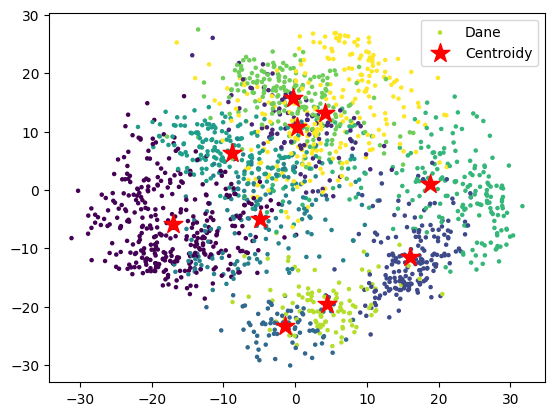

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Przypisanie każdego punktu danych do najbliższego centroidu
def update_assignments(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


# Aktualizacja pozycji centroidów
def update_centroids(data, num_clusters, assignments):
    centroids = []
    for c in range(num_clusters):
        cluster_points = data[np.array(assignments) == c]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
            farthest_point = data[np.argmax(distances)]
            centroids.append(farthest_point)
    return np.array(centroids)

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

num_clusters = n_digits

centroids = data[np.random.choice(len(data), num_clusters, replace=False)]

iteration = 0
while True:
    iteration += 1
    previous_centroids = centroids.copy()
    assignments = update_assignments(data, centroids)
    centroids = update_centroids(data, num_clusters, assignments)
    if np.array_equal(centroids, previous_centroids):
        print(f"Centroidy przestały się zmieniać po {iteration} iteracjach.")
        break

# Redukcja wymiarów do 2D
pca = PCA(2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=assignments, cmap='viridis', s=5, label='Dane')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='red', marker='*', s=200, label='Centroidy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans_ari = adjusted_rand_score(labels, assignments)
kmeans_nmi = normalized_mutual_info_score(labels, assignments)

print(f"k-means ARI: {kmeans_ari:.2f}, NMI: {kmeans_nmi:.2f}")

k-means ARI: 0.55, NMI: 0.68


# 2. Inicjalizacja centroidów k-means++:
Pierwszy centroid wybierany jest losowo, a kolejne centroidy są wybierane z prawdopodobieństwem proporcjonalnym do ich odległości od najbliższego już wybranego centroidu. Dzięki temu punkty, które są dalej od istniejących centroidów, mają większe szanse na zostanie nowymi centroidami, co pozwala na lepsze pokrycie danych i szybszą konwergencję algorytmu.

Centroidy przestały się zmieniać po 24 iteracjach.


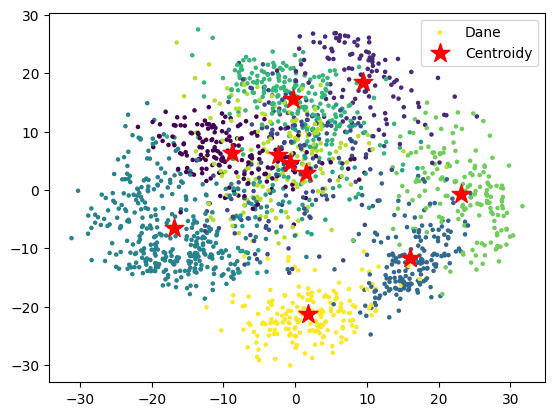

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Przypisanie każdego punktu danych do najbliższego centroidu
def update_assignments(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


# Aktualizacja pozycji centroidów
def update_centroids(data, num_clusters, assignments):
    centroids = []
    for c in range(num_clusters):
        cluster_points = data[np.array(assignments) == c]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
            farthest_point = data[np.argmax(distances)]
            centroids.append(farthest_point)
    return np.array(centroids)


# Inicjalizacja centroidów
def initialize_centroids(data, num_clusters):
    centroids = [data[np.random.choice(len(data))]]  #wybór 1 centroidu
    for _ in range(1, num_clusters):
        distances = np.min([np.linalg.norm(data - centroid, axis=1) for centroid in centroids], axis=0)
        probabilities = distances / np.sum(distances)
        next_centroid = data[np.random.choice(len(data), p=probabilities)]
        centroids.append(next_centroid)
    return np.array(centroids)

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

num_clusters = n_digits
centroids = initialize_centroids(data, num_clusters)

iteration = 0
while True:
    iteration += 1
    previous_centroids = centroids.copy()
    assignments = update_assignments(data, centroids)
    centroids = update_centroids(data, num_clusters, assignments)
    if np.array_equal(centroids, previous_centroids):
        print(f"Centroidy przestały się zmieniać po {iteration} iteracjach.")
        break

# Redukcja wymiarów do 2D
pca = PCA(2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=assignments, cmap='viridis', s=5, label='Dane')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='red', marker='*', s=200, label='Centroidy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans_ari = adjusted_rand_score(labels, assignments)
kmeans_nmi = normalized_mutual_info_score(labels, assignments)

print(f"k-means ARI: {kmeans_ari:.2f}, NMI: {kmeans_nmi:.2f}")

k-means ARI: 0.66, NMI: 0.75


# 3. Inicjalizacja centroidów - random partition:
Najpierw losowo przypisujemy punkty danych do klastrów, a następnie obliczamy centroidy na podstawie tego przypisania (średnia wszystkich punktów przypisanych do danego klastra). Ta metoda charakteryzuje się prostotą i działa bardzo dobrze w przypadku nieskomplikowanych, dobrze zorganizowanych danych. W przypadku złożonych dancyh może prowadzić do nieefektywnej inicjalizacji i dłuższych iteracji.

Centroidy przestały się zmieniać po 16 iteracjach.


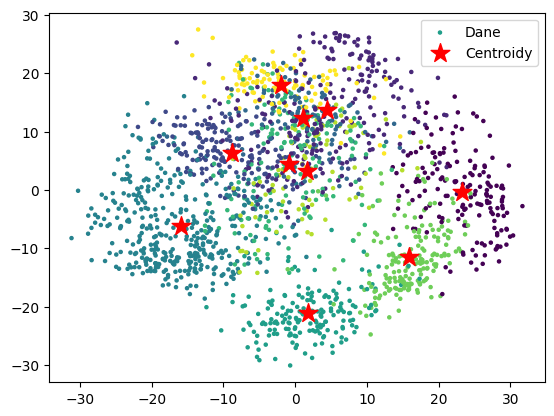

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Przypisanie każdego punktu danych do najbliższego centroidu
def update_assignments(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


# Aktualizacja pozycji centroidów
def update_centroids(data, num_clusters, assignments):
    centroids = []
    for c in range(num_clusters):
        cluster_points = data[np.array(assignments) == c]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
            farthest_point = data[np.argmax(distances)]
            centroids.append(farthest_point)
    return np.array(centroids)


# Inicjalizacja centroidów za pomocą Random Partition
def initialize_centroids_random_partition(data, num_clusters):
    random_assignments = np.random.randint(0, num_clusters, size=len(data))
    centroids = []
    for c in range(num_clusters):
        cluster_points = data[random_assignments == c]
        centroids.append(np.mean(cluster_points, axis=0))
    return np.array(centroids)

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

num_clusters = n_digits

centroids = initialize_centroids_random_partition(data, num_clusters)

iteration = 0
while True:
    iteration += 1
    previous_centroids = centroids.copy()
    assignments = update_assignments(data, centroids)
    centroids = update_centroids(data, num_clusters, assignments)
    if np.array_equal(centroids, previous_centroids):
        print(f"Centroidy przestały się zmieniać po {iteration} iteracjach.")
        break

# Redukcja wymiarów do 2D
pca = PCA(2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=assignments, cmap='viridis', s=5, label='Dane')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='red', marker='*', s=200, label='Centroidy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans_ari = adjusted_rand_score(labels, assignments)
kmeans_nmi = normalized_mutual_info_score(labels, assignments)

print(f"k-means ARI: {kmeans_ari:.2f}, NMI: {kmeans_nmi:.2f}")

k-means ARI: 0.58, NMI: 0.72


# WSZYSTKO W JEDNYM KODZIE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Inicjalizacja centroidów losowo
def random_initialization(data, num_clusters):
    return data[np.random.choice(len(data), num_clusters, replace=False)]

# Inicjalizacja centroidów za pomocą metody k-means++
def kmeans_plus_plus_initialization(data, num_clusters):
    centroids = [data[np.random.choice(len(data))]]  # pierwszy centroid
    for _ in range(1, num_clusters):
        distances = np.min([np.linalg.norm(data - centroid, axis=1) for centroid in centroids], axis=0)
        probabilities = distances / np.sum(distances)
        next_centroid = data[np.random.choice(len(data), p=probabilities)]
        centroids.append(next_centroid)
    return np.array(centroids)

# Inicjalizacja centroidów losowym przypisaniem do istniejących klastrów (Random Partition)
def random_partition_initialization(data, num_clusters):
    random_assignments = np.random.randint(0, num_clusters, size=len(data))
    centroids = []
    for c in range(num_clusters):
        centroids.append(np.mean(data[random_assignments == c], axis=0))
    return np.array(centroids)

def update_assignments(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, num_clusters, assignments):
    centroids = []
    for c in range(num_clusters):
        cluster_points = data[np.array(assignments) == c]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            distances = np.min(np.linalg.norm(data[:, np.newaxis] - np.array(centroids), axis=2), axis=1)
            farthest_point = data[np.argmax(distances)]
            centroids.append(farthest_point)
    return np.array(centroids)

def centroid_initialization(initialization_method):
    data, labels = load_digits(return_X_y=True)
    (n_samples, n_features), n_digits = data.shape, np.unique(labels).size

    num_clusters = n_digits

    centroids = initialization_method(data, num_clusters)

    iteration = 0
    while True:
        iteration += 1
        previous_centroids = centroids.copy()
        assignments = update_assignments(data, centroids)
        centroids = update_centroids(data, num_clusters, assignments)
        if np.array_equal(centroids, previous_centroids):
            print(f"Centroidy przestały się zmieniać po {iteration} iteracjach.")
            break

    # Redukcja wymiarów do 2D
    pca = PCA(2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)

    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=assignments, cmap='viridis', s=5, label='Dane')
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], color='red', marker='*', s=200, label='Centroidy')
    plt.legend()
    plt.show()

    kmeans_ari = adjusted_rand_score(labels, assignments)
    kmeans_nmi = normalized_mutual_info_score(labels, assignments)

    print(f"k-means ARI: {kmeans_ari:.2f}, NMI: {kmeans_nmi:.2f}")


INICJALIZACJA LOSOWA:
Centroidy przestały się zmieniać po 16 iteracjach.


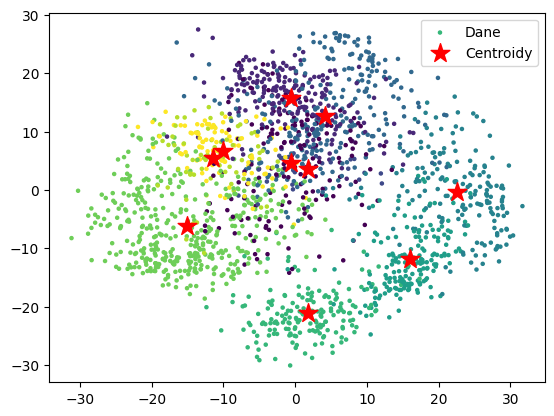

k-means ARI: 0.58, NMI: 0.73

INICJALIZACJA K-MEANS++:
Centroidy przestały się zmieniać po 27 iteracjach.


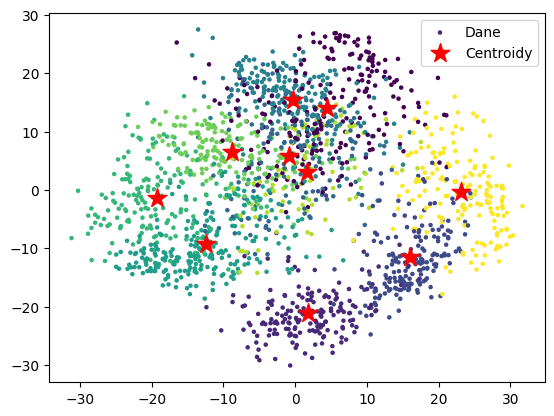

k-means ARI: 0.67, NMI: 0.75

INICJALIZACJA RANDOM PARTITION:
Centroidy przestały się zmieniać po 10 iteracjach.


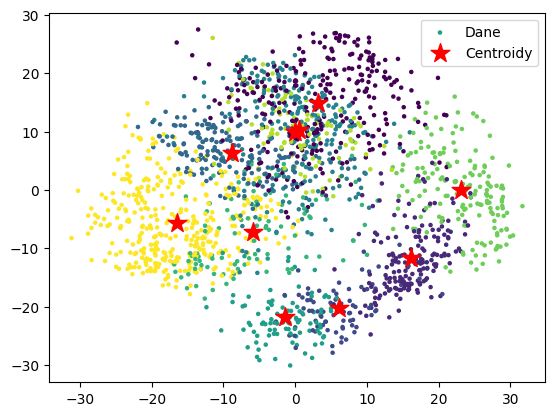

k-means ARI: 0.51, NMI: 0.68


In [ ]:
print("INICJALIZACJA LOSOWA:")
centroid_initialization(random_initialization)

print("\nINICJALIZACJA K-MEANS++:")
centroid_initialization(kmeans_plus_plus_initialization)

print("\nINICJALIZACJA RANDOM PARTITION:")
centroid_initialization(random_partition_initialization)


# PORÓWNANIE NASZEGO ALGORYTMU Z INNYMI ALGORYTMAMI KLASTERAZYCYJNYMI

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, HDBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

'''
def centroid_initialization(initialization_method):
    centroids = initialization_method(data, num_clusters)
    iteration = 0
    while True:
        iteration += 1
        assignments = update_assignments(data, centroids)
        new_centroids = update_centroids(data, num_clusters, assignments)
        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids
    return assignments
'''

def evaluate_clustering(assignments, labels):
    ari = adjusted_rand_score(labels, assignments)
    nmi = normalized_mutual_info_score(labels, assignments)
    return ari, nmi

data, labels = load_digits(return_X_y=True)
num_clusters = len(np.unique(labels))

results = []

algorithms = {
    "KMeans++": lambda: KMeans(n_clusters=num_clusters, init="k-means++", random_state=0).fit_predict(data),
    "Agglomerative (ward)": lambda: AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(data),
    "DBSCAN": lambda: DBSCAN(eps=15, min_samples=5).fit_predict(data),
    "HDBSCAN": lambda: HDBSCAN(min_cluster_size=15, min_samples=5).fit_predict(data),
    "Birch": lambda: Birch(n_clusters=num_clusters).fit_predict(data),
    "Custom": lambda: centroid_initialization(kmeans_plus_plus_initialization),
}

for name, algorithm in algorithms.items():
    print(f"Uruchamianie {name}...")
    try:
        assignments = algorithm()
        ari, nmi = evaluate_clustering(assignments, labels)
        results.append((name, ari, nmi))
    except Exception as e:
        results.append((name, None, None))
        print(f"Algorytm {name} nie działał: {e}")



print(f"\n{'ALGORYTM':<25}{'ARI':<10}{'NMI':<10}")
for name, ari, nmi in results:
    print(f"{name:<25}{ari:<10.2f}{nmi:<10.2f}")


Uruchamianie KMeans++...
Uruchamianie Agglomerative (ward)...
Uruchamianie DBSCAN...
Uruchamianie HDBSCAN...
Uruchamianie Birch...
Uruchamianie Custom...

ALGORYTM                 ARI       NMI       
KMeans++                 0.62      0.73      
Agglomerative (ward)     0.79      0.87      
DBSCAN                   0.01      0.22      
HDBSCAN                  0.47      0.73      
Birch                    0.79      0.87      
Custom                   0.66      0.74      
